In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 100,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1.2,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = None,
    mask = True))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 4
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 200
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 10
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 10, Accuracy: 0.8765432098765432, Loss: 0.6017263906973379
Checkpoint 20, Accuracy: 0.8765432098765432, Loss: 0.593929997196904
Checkpoint 30, Accuracy: 0.8888888888888888, Loss: 0.5331509201614945
Checkpoint 40, Accuracy: 0.8641975308641975, Loss: 0.5225650646068432
Checkpoint 50, Accuracy: 0.8888888888888888, Loss: 0.5155584547254775
Checkpoint 60, Accuracy: 0.8888888888888888, Loss: 0.5164635269730179
Checkpoint 70, Accuracy: 0.8950617283950617, Loss: 0.4503546820746528
Checkpoint 80, Accuracy: 0.9259259259259259, Loss: 0.37715254889594185
Checkpoint 90, Accuracy: 0.9135802469135802, Loss: 0.32083649105495876
Checkpoint 100, Accuracy: 0.9320987654320988, Loss: 0.3129610838713469
Checkpoint 110, Accuracy: 0.9444444444444444, Loss: 0.2668227089775933
Checkpoint 120, Accuracy: 0.9444444444444444, Loss: 0.2786229098284686
Checkpoint 130, Accuracy: 0.9382716049382716, Loss: 0.27594887768780746
Checkpoint 140, Accuracy: 0.9444444444444444, Loss: 0.24182118309868705
Checkpoint 1

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[0. 1. 0.] <-> [6.6392913e-02 9.3328923e-01 3.1787818e-04]
[1. 0. 0.] <-> [0.9037604  0.09256396 0.00367564]
[0. 1. 0.] <-> [2.06632409e-02 9.79231596e-01 1.05190236e-04]
[0. 0. 1.] <-> [2.5387732e-02 3.5669847e-04 9.7425550e-01]
[1. 0. 0.] <-> [0.9942882  0.0015675  0.00414423]
[1. 0. 0.] <-> [0.98792124 0.0085953  0.00348347]
[0. 1. 0.] <-> [0.27162114 0.7273218  0.00105709]
[1. 0. 0.] <-> [0.98744106 0.0090169  0.00354208]
[1. 0. 0.] <-> [0.5940932  0.4035504  0.00235634]
[1. 0. 0.] <-> [0.9927845  0.00309824 0.00411719]
[1. 0. 0.] <-> [0.9893128  0.00597644 0.00471068]
[1. 0. 0.] <-> [0.99296063 0.00370344 0.00333594]
[0. 0. 1.] <-> [0.01283992 0.00856374 0.9785963 ]
[0. 1. 0.] <-> [1.0726807e-01 8.9229900e-01 4.3293703e-04]
[1. 0. 0.] <-> [0.65325695 0.34320134 0.00354163]
[1. 0. 0.] <-> [0.9787409 0.0046013 0.0166578]
[1. 0. 0.] <-> [0.9937603  0.00264212 0.00359755]
[1. 0. 0.] <-> [0.93630254 0.05980853 0.0038889 ]
[1. 0. 0.] <-> [0.41272736 0.00551563 0.581757  ]
[1. 0. 0.] <->

In [11]:
train_acc = [h['accuracy'] for h in history]
train_mse = [h['mean_square_error'] for h in history]
train_cce = [h['categorical_crossentropy'] for h in history]

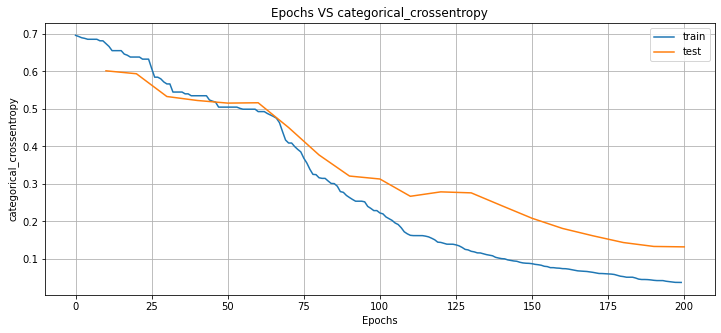

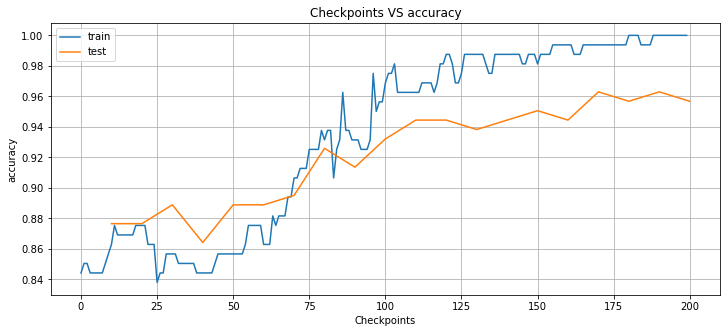

In [12]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_cce, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_acc, acc], x_label = 'Checkpoints', \
    y_label = 'accuracy', legend=['train', 'test'])

In [13]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8765432098765432, 'mean_square_error': 0.3203555857277798, 'categorical_crossentropy': 0.6017263906973379, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 20, 'tn_hit': 10, 'fn_hit': 0}, 1: {'tp_hit': 10, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 6}, 2: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 14}}, 'checkpoint': 10} 


{'accuracy': 0.8765432098765432, 'mean_square_error': 0.3263830706401896, 'categorical_crossentropy': 0.593929997196904, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 18, 'tn_hit': 12, 'fn_hit': 2}, 1: {'tp_hit': 12, 'fp_hit': 2, 'tn_hit': 90, 'fn_hit': 4}, 2: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 14}}, 'checkpoint': 20} 


{'accuracy': 0.8888888888888888, 'mean_square_error': 0.2859275426396146, 'categorical_crossentropy': 0.5331509201614945, 'essential_metrics': {0: {'tp_hit': 77, 'fp_hit': 15, 'tn_hit': 15, 'fn_hit': 1}, 1: {'tp_hit': 13, 'fp_hit': 3, 'tn_hit': 89, 'fn_hit': 3}, 2: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 94, 'fn_hi

In [14]:
print(model)

Layer 1
Neuron 0: weights:
[ 0.7283834  3.        -1.9346845 -3.        -3.       ]
 bias: 1.3858060836791992

Neuron 1: weights:
[ 1.6831226 -2.421241  -1.6813729 -2.8260114 -0.6544246]
 bias: 0.24091586470603943

Neuron 2: weights:
[-2.083355    3.          3.          1.1637467  -0.44096324]
 bias: -1.6560229063034058

Neuron 3: weights:
[-0.6496887  3.         2.5708156 -3.        -1.8143741]
 bias: 3.0

$
Layer 2
Neuron 0: weights:
[ 2.8372428  1.7719728 -3.         0.9943787]
 bias: -1.3866968154907227

Neuron 1: weights:
[ 0.30779687 -2.544773    3.          1.1073135 ]
 bias: -1.1806923151016235

Neuron 2: weights:
[-3.         1.4130138 -3.        -3.       ]
 bias: 3.0

$

